In [38]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import cv2
import glob
import pandas as pd
from keras.preprocessing import image
from csv import reader
from csv import writer
import csv

### DataPreprocessing and Pipelining

In [2]:
train_data = pd.read_csv('C:/Users/hp/Pokemons_On_Goa_Trip_Challenge/PokemonsOnGoaTrip_Dataset/train.csv').values
test_data = pd.read_csv('C:/Users/hp/Pokemons_On_Goa_Trip_Challenge/PokemonsOnGoaTrip_Test/test.csv').values

In [3]:
# getting labels
img_id = train_data[:,0]
labels = train_data[:,1]
test_id = test_data[:,0]

In [4]:
#print(type(labels))
#print(len(labels))
print(labels)

['Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pika

In [5]:
# assigning the labels
labels[labels=='Pikachu']=0
labels[labels=='Charmander']=2
labels[labels=='Bulbasaur']=1
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


In [6]:
# now getting images
images_data = []
for imgId in img_id:
    image = cv2.imread("C:/Users/hp/Pokemons_On_Goa_Trip_Challenge/PokemonsOnGoaTrip_Dataset/Images/"+imgId)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(50,50))
    images_data.append(image)


In [7]:
# Convert images_data array into numpy array
images_data=np.array(images_data,dtype='float32')/255.0
#print(images_data)
print(images_data.shape,labels.shape)


(304, 50, 50, 3) (304,)


In [8]:
# Zip image data and the labels together to shuffle them 
import random
combined = list(zip(images_data,labels))
random.shuffle(combined)

# unzip
images_data[:],labels[:] = zip(*combined)

### Visualize the data ie let's check whether we have correctly oaded the images or not

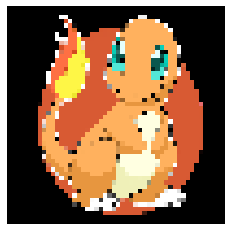

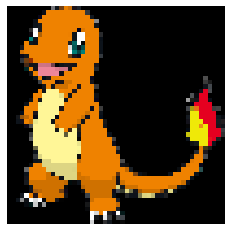

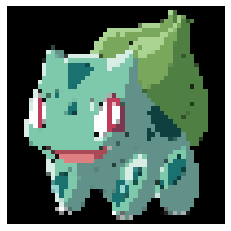

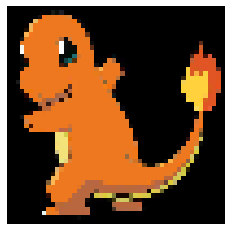

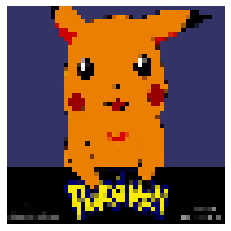

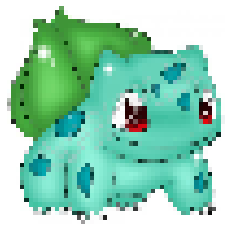

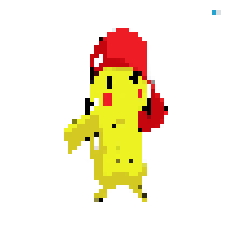

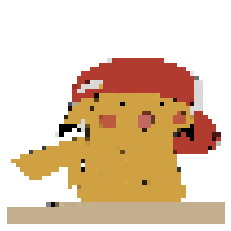

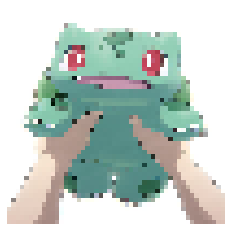

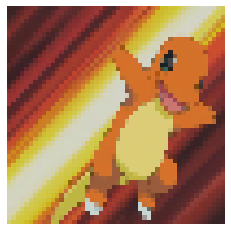

In [9]:
def display(img):
    plt.imshow(img)
    plt.axis(False)
    plt.show()
    
for i in range(10):
    display(images_data[i])

## Class SVM

In [10]:
class SVM:
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0
    def hingeLoss(self,W,b,X,Y):
        loss=0.0
        loss+=0.5*np.dot(W,W.T)
        
        m=X.shape[0] ## m->total number of examples
        
        for i in range(m):
            ti=Y[i]*(np.dot(W,X[i])+b)
            loss += self.C*max(0,(1-ti))
        return loss[0][0]
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n=learning_rate
        c=self.C
        
        #initialize the model parameters
        W = np.zeros((1,no_of_features))
        bias=0
        #print(self.hingeLoss(W,bias,X,Y))
        
        # Training starts from here
        # implementing weight update rule and the bias update rule
        losses=[]
        
        for i in range(maxItr):
            #Training loop
            l=self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            
            ids = np.arange(no_of_samples) # generating id for each of the sample
            np.random.shuffle(ids)
            
            # Batch Gradient Descent with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                # assuming 0 gradient for the batch initially
                gradw=0
                gradb=0
                
                #iterating over all the examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i=ids[j]
                        ti=Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=c*Y[i]*X[i]
                            gradb+=c*Y[i]
                # gradient fo rthe batch is ready update weight and the bias
                W = W - n*W + n*gradw
                bias = bias + n*gradb
        self.W = W
        self.b = bias
        return W,bias,losses

In [11]:
#images_data.shape

In [12]:
samples = images_data.shape[0]
images_data = images_data.reshape(samples,-1) # reshaping images_data
print(images_data.shape)
print(labels.shape)

(304, 7500)
(304,)


In [13]:
no_of_classes = len(np.unique(labels))
print(no_of_classes)

3


In [14]:
def classWiseData(x,y):
    data = {} # this dictionary will stor the key value pairs,where keys will be among one of the three labels and values will 
    for i in range (labels.shape[0]):
        data[i]=[]
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    for k in data.keys():
        data[k] = np.array(data[k]) # converting the array corresponding to every key into a numpy arra
    return data

In [15]:
data = classWiseData(images_data,labels)

In [16]:
#print(data[0].shape[0])
#print(data[0].shape)
#print(data[1].shape[0])
#print(data[1].shape)
# and so on

In [17]:
def getDataPairForSVM(d1,d2):
    """Combined the Data of two classes d1 and d2 into a single matrix"""
    
    l1,l2 = d1.shape[0],d2.shape[0]
    
    total_samples = l1+l2 #total number of smaples present int the two classes.They define the total number of rows required
    features = d1.shape[1] # number of features of each sample.They define the total number of columns required
    
    data_pair = np.zeros((total_samples,features))
    data_labels = np.zeros((total_samples,))
    
    data_pair[:l1 , :] = d1 # copying the data of the class d1 in the first part of the data_pair matrix
    data_pair[l1: , :] = d2 # copying the data of the class d2 in the second part of the data_pair matrix
    
    data_labels[:l1] = -1 # keeping the first l1 laabels of data_labels as class '-1'
    data_labels[l1:] = +1 # keeping the second part of data labels as class '+1'
    
    return data_pair,data_labels # data_pair effers to the X data ie input data , Y data reffers to the output data or output classes

### Training NC2 SVM's Part!

In [18]:
# creating an object of the class SVM
mySVM = SVM()


# For debugging the code we are checking only for the two data values
"""
xp,yp = getDataPairForSVM(data[1],data[2])
w,b,loss = mySVM.fit(xp,yp,learning_rate = 0.00001,maxItr=1000)
#print(loss)
plt.plot(loss)

"""



'\nxp,yp = getDataPairForSVM(data[1],data[2])\nw,b,loss = mySVM.fit(xp,yp,learning_rate = 0.00001,maxItr=1000)\n#print(loss)\nplt.plot(loss)\n\n'

In [19]:
def trainSVMs(x,y):
    svm_classifiers = {}
    for i in range(no_of_classes): # iterate over all classes
        svm_classifiers[i]={}
        for j in range(i+1,no_of_classes): # since we are alredy in ith class so leaving ith class iterate over all remaining classes
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate = 0.00001,maxItr=1000)
            svm_classifiers[i][j] = (wts,b) # i and j are the two classes for which the hypothetical values are found and thereby stores in the 2-d dictionary svm_classifiers
            
            plt.plot(loss)
            plt.show()
            
    return svm_classifiers
    

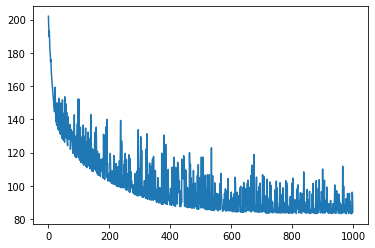

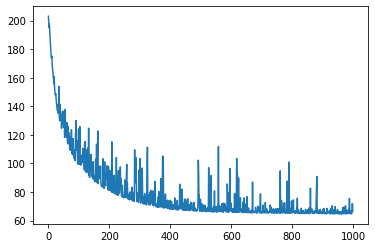

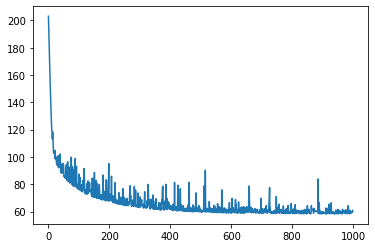

In [20]:
svm_classifiers = trainSVMs(images_data,labels)

In [21]:
pikachu_bulbasaur = svm_classifiers[0][1] # where 0 reffers to the 0th class ie pikcahu class and 1 reffers to the 1st class ie bulbasaur
print(pikachu_bulbasaur[0]) #weights learnt by the classifier model for the two classes ie pikachu class having label 0 and the bulbasaur class having the label 1
print(pikachu_bulbasaur[1]) #value of constant bias term learnt by the classifier model for the two classes ie pikachu class having label as 0 and the bulbasaur class having the label as 1

[[ 7.19591592e-05 -2.12507539e-03  7.03683393e-04 ... -3.89063685e-03
  -2.58237920e-03 -2.32487607e-03]]
0.010230000000000046


In [22]:
# binary Predict() is going to be the actual prediction of SVM because it can give only two classes ie -1 and 1
def binaryPredict(x,w,b):
    z = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1

In [23]:
def predict(x): # x reffers to test data
    count = np.zeros((no_of_classes,))
    
    for i in range(no_of_classes):
        for j in range(i+1,no_of_classes):
            w,b = svm_classifiers[i][j]
            
            # take the majority prediction
            z = binaryPredict(x,w,b) # z is the output ie the prediction , ie the value of z would be either 1 or -1 
            # remember  we made a pair of class[i] and class[j] and kept set class[i]=-1 and class[j]=1
            if(z==1):
                count[j] += 1 # j here reffers to the second class of the pair ie it can be 0,1,or 2 which also corresponds to the indices of numpy array count
            else:
                count[i] += 1 # # j here reffers to the second class of the pair ie it can be 0,1,or 2 which also corresponds to the indices of numpy array count
                
    final_prediction = np.argmax(count)
    return final_prediction
    

In [24]:
print(predict(images_data[0]))
print(labels[0])

2
2


In [25]:
def accuracy(x,y):
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction == y[i]):
            count += 1
    return count/x.shape[0]

In [26]:
accuracy(images_data,labels)

0.6907894736842105

### Now predicting on test data

In [27]:
print(test_id)
print(test_id.shape)

['1106.jpg' '2236.jpg' '1131.jpg' '2221.jpg' '2011.jpg' '2030.jpg'
 '2035.jpg' '1110.jpg' '1104.jpg' '2217.jpg' '1111.jpg' '1100.jpg'
 '1112.jpg' '1138.jpg' '2238.jpg' '2009.jpg' '2225.jpg' '2240.jpg'
 '2020.jpg' '2209.jpg' '2029.jpg' '1114.jpg' '2201.jpg' '1118.jpg'
 '2025.jpg' '2202.jpg' '1117.jpg' '1119.jpg' '2000.jpg' '2007.jpg'
 '2039.jpg' '2017.jpg' '2215.jpg' '1120.jpg' '2006.jpg' '1116.jpg'
 '1128.jpg' '1125.jpg' '2203.jpg' '1133.jpg' '1137.jpg' '2220.jpg'
 '2012.jpg' '2224.jpg' '2206.jpg' '1122.jpg' '2223.jpg' '1102.jpg'
 '2234.jpg' '2216.jpg' '2016.jpg' '2227.jpg' '2013.jpg' '1113.jpg'
 '2204.jpg' '1101.jpg' '2208.jpg' '2024.jpg' '2031.jpg' '2222.jpg'
 '2211.jpg' '2033.jpg' '2213.jpg' '2231.jpg' '2001.jpg' '2040.jpg'
 '1127.jpg' '2023.jpg' '2015.jpg' '1121.jpg' '2232.jpg' '1139.jpg'
 '1103.jpg' '2018.jpg' '2233.jpg' '2212.jpg' '2210.jpg' '2228.jpg'
 '2026.jpg' '1132.jpg' '2003.jpg' '1129.jpg' '2214.jpg' '1123.jpg'
 '2004.jpg' '1136.jpg' '1140.jpg' '2226.jpg' '2230.jpg' '1135.

In [28]:
# Now getting images

In [29]:
test_image_data = []
for testId in test_id:
    image = cv2.imread('C:/Users/hp/Pokemons_On_Goa_Trip_Challenge/PokemonsOnGoaTrip_Test/Images/'+testId)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(50,50))
    test_image_data.append(image)

In [30]:
#print(test_image_data)
# Convert test_image_data  into numpy array
test_image_data =np.array(test_image_data,dtype='float32')/255.0
print(test_image_data.shape)

(123, 50, 50, 3)


In [31]:
# reshaping test data
test_samples= test_image_data.shape[0]
test_image_data = test_image_data.reshape(test_samples,-1)
print(test_image_data.shape)

(123, 7500)


In [32]:
output=[]
for x in range(test_image_data.shape[0]):
    op = predict(test_image_data[x])
    if op==0:
        output.append('Pikachu')
    elif op==1:
        output.append('Bulbasaur')
    else:
        output.append('Charmender')
    
    
#output[output==0]='Pikachu'
#output[output==2]='Charmander'
#output[output==1]='Bulbasaur'

In [33]:
print(output)

['Bulbasaur', 'Charmender', 'Bulbasaur', 'Charmender', 'Charmender', 'Charmender', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Charmender', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Charmender', 'Bulbasaur', 'Charmender', 'Charmender', 'Bulbasaur', 'Charmender', 'Charmender', 'Bulbasaur', 'Charmender', 'Bulbasaur', 'Charmender', 'Charmender', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Charmender', 'Bulbasaur', 'Charmender', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Charmender', 'Bulbasaur', 'Bulbasaur', 'Charmender', 'Charmender', 'Bulbasaur', 'Charmender', 'Bulbasaur', 'Charmender', 'Bulbasaur', 'Charmender', 'Charmender', 'Pikachu', 'Charmender', 'Charmender', 'Bulbasaur', 'Charmender', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Charmender', 'Charmender', 'Charmender', 'Pikachu', 'Charmender', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Charmender', 'Charmender', 'Charmender'

#### Now preparing the Output.csv file 

In [ ]:
with open('C:/Users/hp/Pokemons_On_Goa_Trip_Challenge/PokemonsOnGoaTrip_Test/output1.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('C:/Users/hp/Pokemons_On_Goa_Trip_Challenge/PokemonsOnGoaTrip_Test/output1.csv','w',newline='') as f:
    w=csv.writer(f)
    w.writerow(['ImageId','NameOfPokemon'])
    w.writerows(data)

In [40]:
with open('C:/Users/hp/Pokemons_On_Goa_Trip_Challenge/PokemonsOnGoaTrip_Test/test.csv','r') as read_obj,open('D:/output1','w',newline='') as write_obj:
    # Create a csv reader object from the test file object
    csv_reader = reader(read_obj)
    # Create a csv writer object from the output file object
    csv_writer = writer(write_obj)
    
    # Read each row in the test.csv file as a list
    i=-1 
    for row in csv_reader:
        if i==-1:
            row.append('NameOfPokemon')
            i=i+1
        else:
            row.append(output[i])
            
            # add the updates row list to the output file
            csv_writer.writerow(row)
            i=i+1
    

In [41]:
with open('D:/output1',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('D:/output1','w',newline='') as f:
    w=csv.writer(f)
    w.writerow(['ImageId','NameOfPokemon'])
    w.writerows(data)

### Using inbuilt SVM

In [ ]:
from sklearn import svm

In [ ]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))
svm_classifier = svm.SVC(kernel = 'linear',C=1.0)

In [ ]:
svm_classifier.fit(images_data,labels)
svm_classifier.score(images_data,labels)